# Introducing Scikit-Learn

### Basics of the API

The steps of one Scikit-Learn estimator:

1. Choose a model and import it (The models are class).
2. Make an instance and choose the hyperparameters.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.



In [1]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self

In [2]:
%matplotlib inline
import numpy as np
import pylab as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

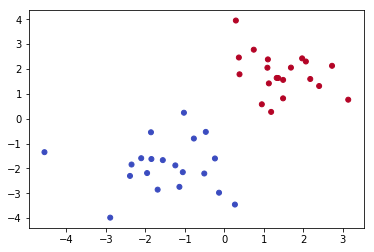

In [6]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)

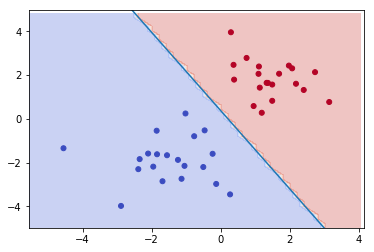

In [15]:
fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

**Supervised learning**:

  - Linear models (Ridge, Lasso, Elastic Net, ...)
  - Support Vector Machines
  - Tree-based methods (Random Forests, Bagging, GBRT, ...)
  - Nearest neighbors 
  - Neural networks (basics)

**Unsupervised learning**:

  - Clustering (KMeans, Ward, ...)
  - Outlier detection

## Accuracy and precision

1. precision: 
The fraction of relevant instances among the retrieved instances, 
1. recall:
The fraction of relevant instances that have been retrieved over the total amount of relevant instances. 
1. F-score


* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

* The support is the number of occurrences of each class in y_true.

Take a look at [HERE](https://en.wikipedia.org/wiki/F1_score) or [HERE](https://en.wikipedia.org/wiki/Precision_and_recall).

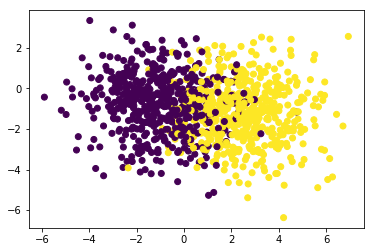

In [3]:
# Generate data
from sklearn.datasets import make_blobs,make_circles,make_moons
X, y = make_blobs(n_samples=1000, centers=2,
                  cluster_std=1.5,
                  center_box=(-4.0, 4.0))
# X, y = make_circles(n_samples=1000, noise=.05, factor=.5)
# X,y = make_moons(n_samples=1000, noise=.05)

plt.scatter(X[:,0],X[:,1],c=y,)


In [5]:
print(X[:5]) 

[[ 0.21046649 -2.71428506]
 [ 2.22501727 -1.27184575]
 [ 2.34093076 -0.91781464]
 [-2.43273456 -0.25884974]
 [-0.97239553 -1.44875417]]


In [6]:
print(y[:5])

[0 1 1 0 0]


In [7]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


In [8]:
X_train, y_train = X[:700], y[:700]
X_test, y_test = X[700:], y[700:]

## K-Nearest Neighbours

In [10]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

In [11]:
y_pred[:5],y_test[:5]

(array([0, 0, 0, 1, 1]), array([1, 0, 0, 0, 1]))

In [13]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       154
           1       0.88      0.88      0.88       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

accuracy is 0.8833333333333333


In [60]:
# Compute (approximate) class probabilities
print(Model.predict_proba(X_test[:5]))

[[0.875 0.125]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]]


##  Radius Neighbors Classifier

In [14]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
#Accouracy score
print('accuracy is ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.34      0.51       154
           1       0.59      0.99      0.74       146

    accuracy                           0.66       300
   macro avg       0.79      0.67      0.62       300
weighted avg       0.79      0.66      0.62       300

accuracy is  0.66


## Naive Bayes

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}

In [15]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       154
           1       0.87      0.90      0.89       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

accuracy is 0.89


## SVM

In [16]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC(kernel='linear')
# Model = svm.LinearSVC(C=1)

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       154
           1       0.88      0.91      0.89       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

accuracy is 0.8933333333333333


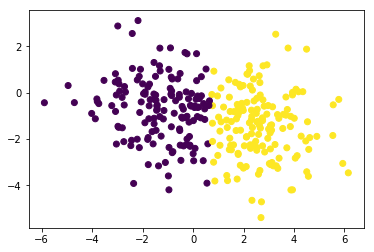

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,)

## Decision Tree

In [20]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       154
           1       0.85      0.83      0.84       146

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[132  22]
 [ 25 121]]
accuracy is 0.8433333333333334


## RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier
Model= RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       154
           1       0.87      0.90      0.89       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[135  14]
 [ 19 132]]
accuracy is  0.89


## Neural network

In [23]:
from sklearn.neural_network import MLPClassifier
Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       154
           1       0.87      0.92      0.89       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[134  20]
 [ 12 134]]
accuracy is  0.8933333333333333
